In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
from gi import histoplot, scatter_xy, scatter_xyze, plot_time, plot_amplitude
from gi import event_size, event_edep, event_mult, event_class, fiducial_df, twocluster_df, add_distances, three_cluster_df
from controlHistos import read_histograms, plot_histogram
from imgs import select_image_from_df, select_image_from_df3, plot_image, select_event, plot_event

## Read gamma interaction file

In [4]:
rootdir = "/Users/jjgomezcadenas/Data/G4Prods/crystalGI/Test/"

In [8]:
filenm = "global_pars_1ns.csv"

In [9]:
dfgp = pd.read_csv(f"{rootdir}/{filenm}", header=0)

In [10]:
dfgp

,seed,timeBinning,gammaEnergy,crystalWidth,crystalLength,material,sipmXY,numberOfEvents
0,12340001,1,0.511,48,37.2,CsITl,6,200


In [11]:
filenm = "gamma_interactions_test_1ns.csv"

In [12]:
df = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [13]:
df.head(10)

,event,time,x,y,z,edep
0,0,45.1,20.2,-6.4,-5.0,297.7
5,0,57.6,16.7,-6.7,-6.5,213.3
29,1,24.6,-10.1,-19.9,-11.1,4.7
37,2,117.1,8.6,-21.6,16.6,124.2
42,3,111.1,2.1,-20.4,14.7,123.3
43,3,144.9,6.9,-12.3,11.0,258.9
58,4,103.3,8.3,-5.8,5.4,178.8
57,4,90.5,9.2,-4.0,8.6,332.2
80,5,157.7,11.4,19.9,17.0,127.6
79,5,151.0,10.7,18.8,15.5,69.5


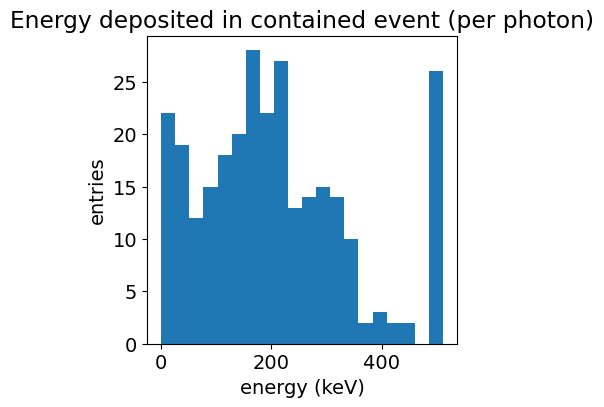

In [14]:
b, e = histoplot(df.edep, 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Energy deposited in contained event (per photon)")

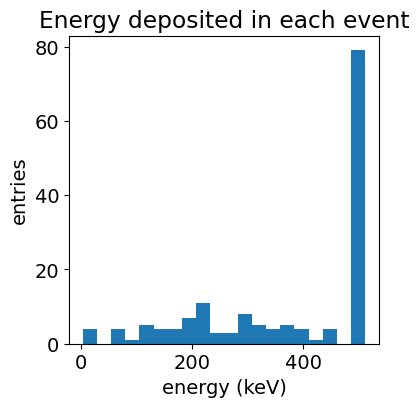

In [15]:
b, e = histoplot(event_edep(df), 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Energy deposited in each event")

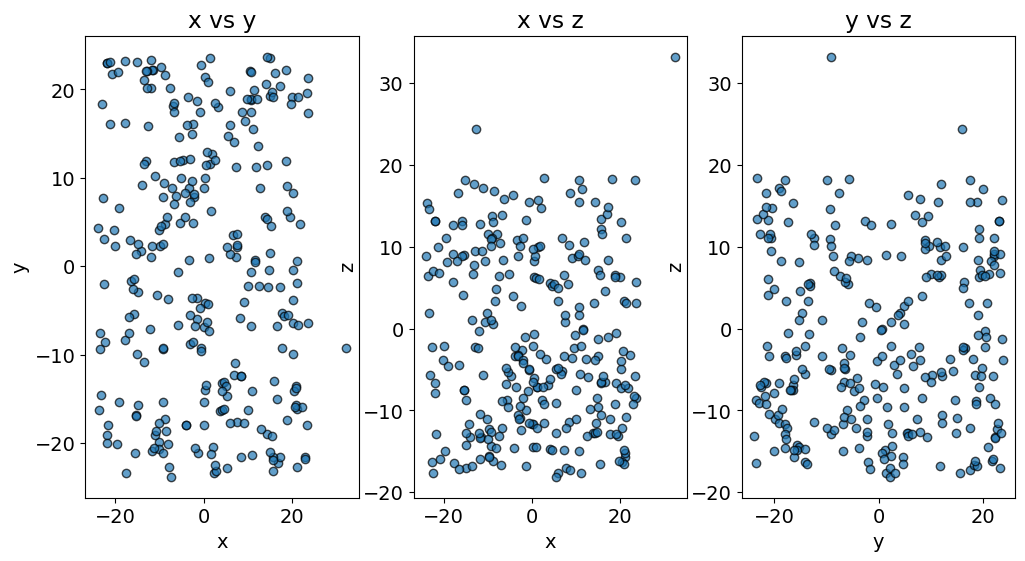

In [16]:
scatter_xy(df, figsize=(12, 6))

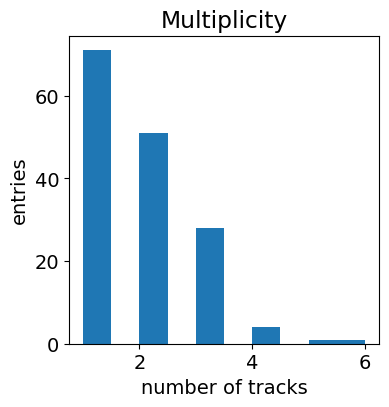

In [17]:
b, e = histoplot(event_mult(df), 'number of tracks', "entries", bins=10, figsize=(6,6),
                title="Multiplicity")

In [18]:
ntot = dfgp.numberOfEvents.values[0]
x_int = event_size(df)/ntot

In [19]:
print(f"fraction of events interacting in crystal = {x_int}")

fraction of events interacting in crystal = 0.78


### Define a fiducial dataframe
- cut events where motherid not 1
- Impose to be inside crystal dimensions
- Tracklength less than 1 mm.
- add total energy and number of particles in the event
- remove mass and motherid (its alwasy e-,  and 1)

In [20]:
dfx = fiducial_df(df, d=48.2, z=37.2)

In [21]:
dfx.head(10)

,event,time,x,y,z,edep,etot,ntrk
0,0,45.1,20.2,-6.4,-5.0,297.7,511.0,2
1,0,57.6,16.7,-6.7,-6.5,213.3,511.0,2
2,1,24.6,-10.1,-19.9,-11.1,4.7,4.7,1
3,2,117.1,8.6,-21.6,16.6,124.2,124.2,1
4,3,111.1,2.1,-20.4,14.7,123.3,382.2,2
5,3,144.9,6.9,-12.3,11.0,258.9,382.2,2
6,4,103.3,8.3,-5.8,5.4,178.8,511.0,2
7,4,90.5,9.2,-4.0,8.6,332.2,511.0,2
8,5,157.7,11.4,19.9,17.0,127.6,511.1,5
9,5,151.0,10.7,18.8,15.5,69.5,511.1,5


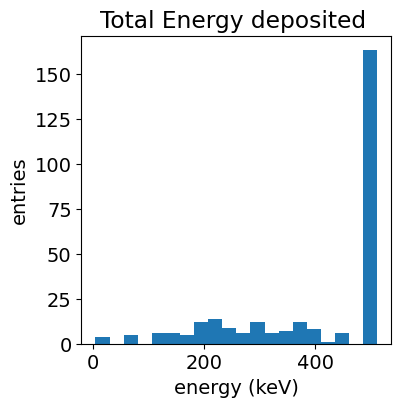

In [22]:
b, e = histoplot(dfx.etot, 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Total Energy deposited ")

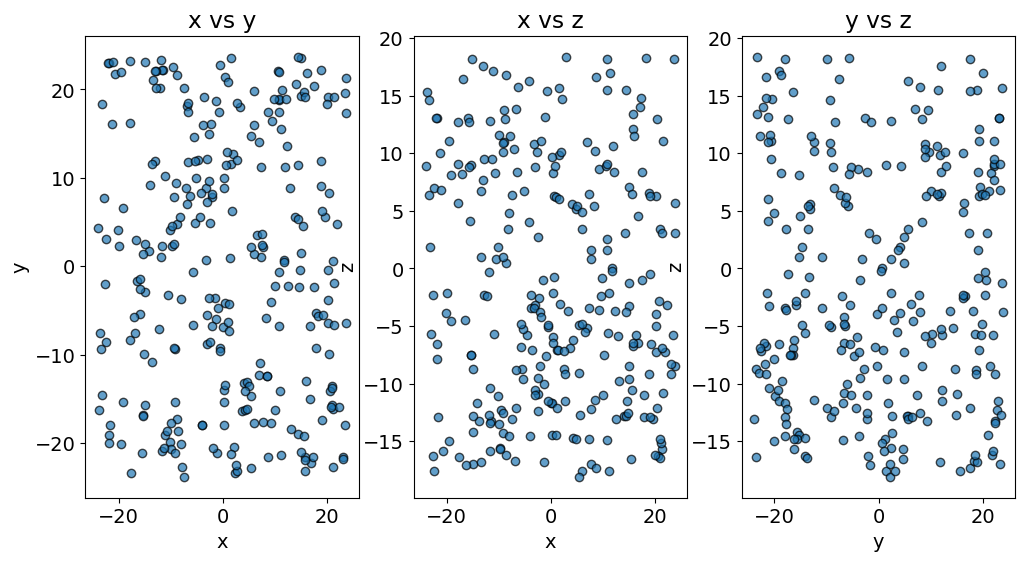

In [23]:
scatter_xy(dfx, figsize=(12, 6))

In [24]:
event_size(dfx)/event_size(df)

0.9935897435897436

##  Sensor Data

In [32]:
filenm = "sensor_data_csi_100ps.csv"
dfp = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')
dfp.head(10)

,event,sensor_id,time,charge
105224,0,51,36188,1
146873,0,62,7830,1
146872,0,62,7733,1
146870,0,62,7715,1
146869,0,62,7630,1
146865,0,62,7613,1
146861,0,62,7568,1
146857,0,62,7546,1
146853,0,62,7540,1
146849,0,62,7536,1


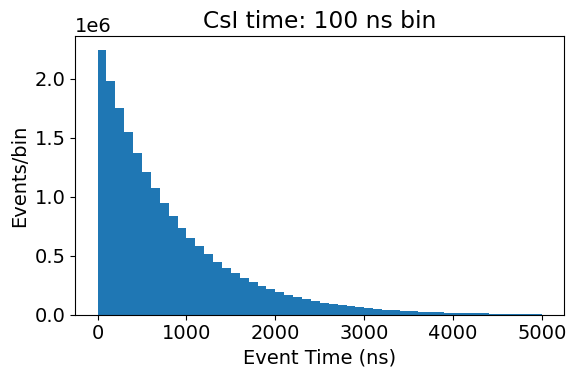

In [41]:
plot_time(dfp, num_bins = 50, xmin=0.0, xmax=5e+3, timebin=0.1, figsize=(6, 4), title="CsI time: 100 ns bin")

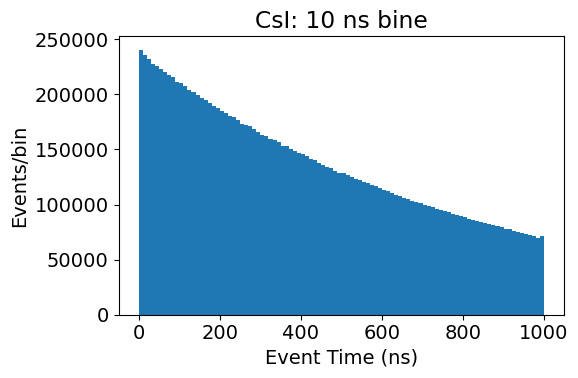

In [42]:
plot_time(dfp, num_bins = 100, xmin=0.0, xmax=1e+3, timebin=0.1, figsize=(6, 4), title="CsI: 10 ns bine")

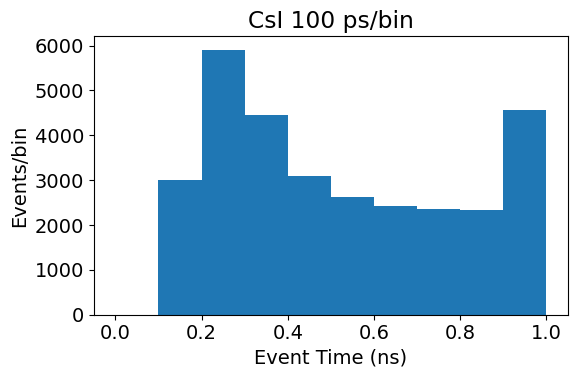

In [44]:
plot_time(dfp, num_bins = 10, xmin=0.0, xmax=1e+0, timebin=0.1, figsize=(6, 4), title="CsI 100 ps/bin")

### Cut in energy
- Only events with energy near the photopeak are relevant

In [39]:
dfe = dfx[dfx.etot>500] # As an example, in practice resolution depends on crystal

In [40]:
dfe.head(10)

,event,time,x,y,z,edep,etot,ntrk
0,0,45.1,20.2,-6.4,-5.0,297.7,511.0,2
1,0,57.6,16.7,-6.7,-6.5,213.3,511.0,2
6,4,90.5,9.2,-4.0,8.6,332.2,511.0,2
7,4,103.3,8.3,-5.8,5.4,178.8,511.0,2
8,5,82.8,0.6,11.5,6.3,14.3,511.1,5
9,5,95.0,1.5,11.6,9.9,94.3,511.1,5
10,5,140.7,10.7,17.4,18.2,205.4,511.1,5
11,5,151.0,10.7,18.8,15.5,69.5,511.1,5
12,5,157.7,11.4,19.9,17.0,127.6,511.1,5
13,6,12.2,7.3,1.1,-14.8,511.0,511.0,1


In [41]:
x_e = event_size(dfe)/ntot
print(f"fraction of events with e > 500 keV = {x_e}")

fraction of events with e > 500 keV = 0.3445


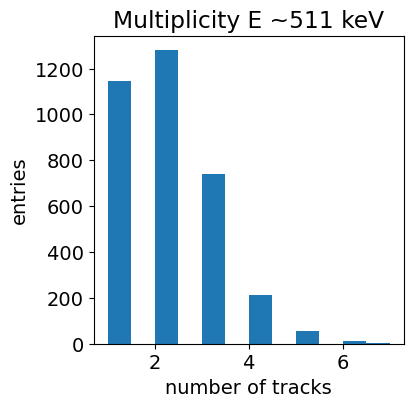

In [42]:
b, e = histoplot(event_mult(dfe), 'number of tracks', "entries", bins=12, figsize=(6,6),
                title="Multiplicity E ~511 keV")

### Create a two-cluster df

In [43]:
df2c = twocluster_df(dfe)

In [44]:
add_distances(df2c)

In [45]:
df2c.head(10)

,index,event,etot,ntrk,t1,x1,y1,z1,e1,t2,...,e2,x12,y12,z12,xb,yb,zb,d12,d12b,d1b
0,0,0,511.0,2,45.1,20.2,-6.4,-5.0,297.7,57.6,...,213.3,18.739041,-6.525225,-5.626125,18.739041,-6.525225,-5.626125,3.819686,0.000000,1.594401
1,1,4,511.0,2,90.5,9.2,-4.0,8.6,332.2,103.3,...,178.8,8.885088,-4.629824,7.480313,8.885088,-4.629824,7.480313,3.780212,0.000000,1.322704
2,2,5,511.1,5,82.8,0.6,11.5,6.3,14.3,95.0,...,94.3,0.293543,2.462004,2.002857,8.894737,16.979319,15.668930,3.712142,21.713925,10.012229
3,3,6,511.0,1,12.2,7.3,1.1,-14.8,511.0,12.2,...,511.0,7.300000,1.100000,-14.800000,7.300000,1.100000,-14.800000,0.000000,0.000000,0.000000
4,4,8,511.0,1,7.1,-17.6,-23.4,-16.4,511.0,7.1,...,511.0,-17.600000,-23.400000,-16.400000,-17.600000,-23.400000,-16.400000,0.000000,0.000000,0.000000
5,5,9,511.0,2,98.7,21.4,19.2,11.1,338.7,115.2,...,172.3,20.961663,19.200000,9.481526,20.961663,19.200000,9.481526,4.972927,0.000000,1.676781
6,6,10,511.0,1,22.8,-14.2,1.7,-11.7,511.0,22.8,...,511.0,-14.200000,1.700000,-11.700000,-14.200000,1.700000,-11.700000,0.000000,0.000000,0.000000
7,7,11,511.0,1,32.6,-14.9,-2.9,-8.7,511.0,32.6,...,511.0,-14.900000,-2.900000,-8.700000,-14.900000,-2.900000,-8.700000,0.000000,0.000000,0.000000
8,8,12,511.0,1,91.4,-24.0,4.3,8.9,511.0,91.4,...,511.0,-24.000000,4.300000,8.900000,-24.000000,4.300000,8.900000,0.000000,0.000000,0.000000
9,9,14,511.0,4,17.4,-13.9,9.2,-13.3,45.5,95.9,...,149.7,-3.171174,4.276047,1.276575,-5.082250,9.926008,7.801292,23.042135,8.840034,18.757120


In [46]:
dfpe = df2c[df2c.ntrk==1]
dfco = df2c[df2c.ntrk>1]
print(f"Fraction of photoelectric events  = {event_size(dfpe)/event_size(df2c)}, of compton = {event_size(dfco)/event_size(df2c)}")
print(f"wrt total phe  = {event_size(dfpe)/ntot}, compton = {event_size(dfco)/ntot}")

Fraction of photoelectric events  = 0.3320754716981132, of compton = 0.6679245283018868
wrt total phe  = 0.1144, compton = 0.2301


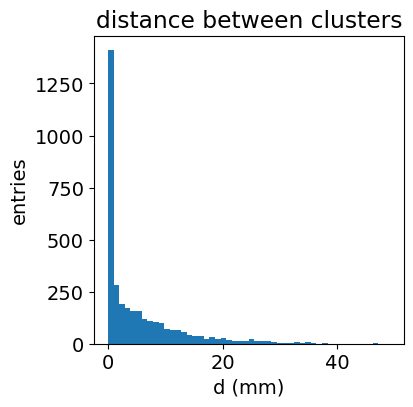

In [47]:
b, e = histoplot(df2c.d12, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between clusters")

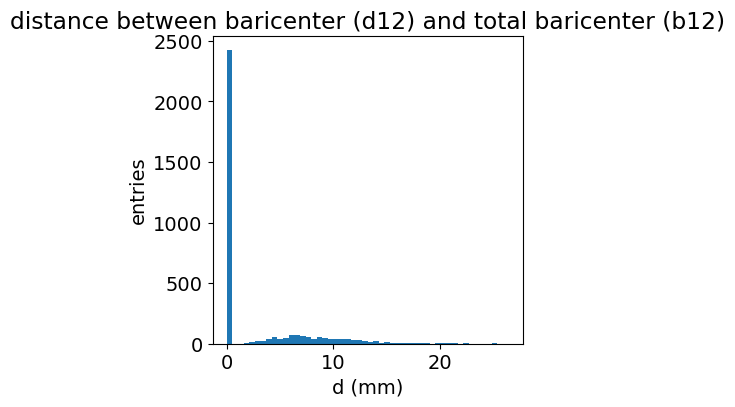

In [48]:
b, e = histoplot(df2c.d12b, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between baricenter (d12) and total baricenter (b12)")

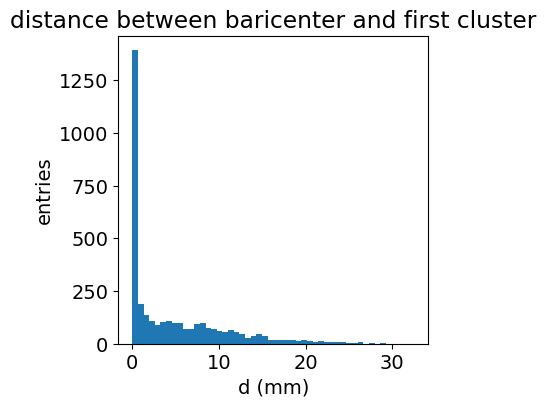

In [49]:
b, e = histoplot(df2c.d1b, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between baricenter and first cluster")

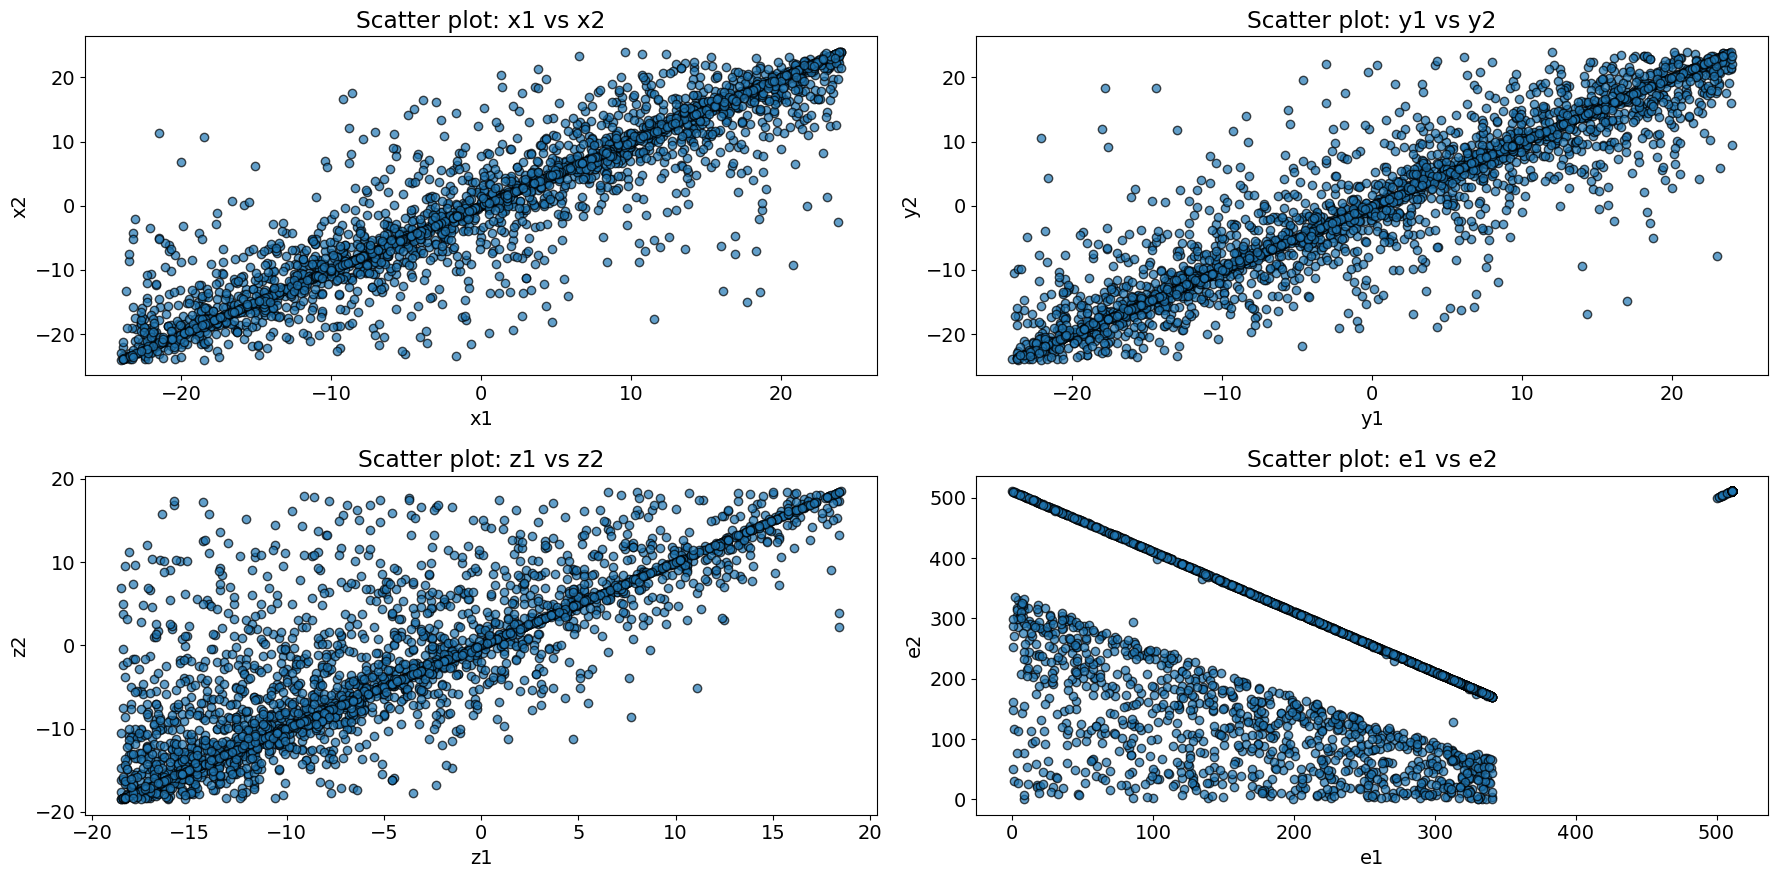

In [50]:
scatter_xyze(df2c)

## Optical photons

### Sensor data

In [51]:
filenm = "sensor_data_test_1.csv"

In [52]:
dfp = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [53]:
dfp.head(10)

,event,sensor_id,time,charge
5318,0,60,16,3
7084,0,13,3,41
7083,0,13,2,82
7082,0,13,1,90
7081,0,13,0,99
7080,0,18,32,1
4134,0,44,11,6
7079,0,18,24,1
7078,0,18,23,2
7085,0,13,4,30


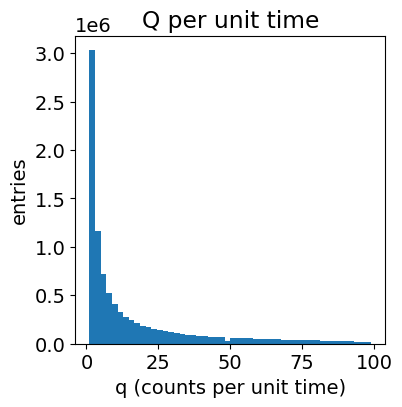

In [54]:
b, e = histoplot(dfp.charge[dfp.charge<100], 'q (counts per unit time)', "entries", bins=50, figsize=(6,6),
                title="Q per unit time")

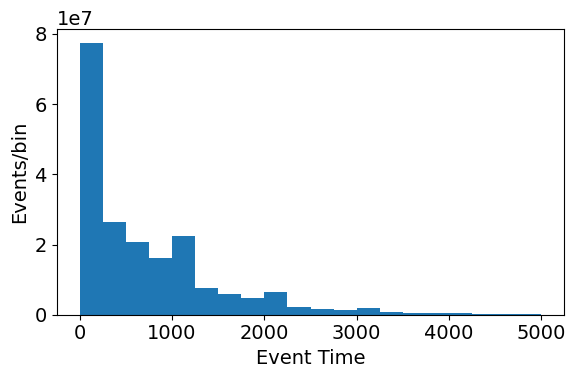

In [55]:
plot_time(dfp, num_bins = 20, xmin=0.0, xmax=5e+3, timebin=200, figsize=(6, 4), title="")

### Integrated sensor data

In [56]:
filenm = "isensor_data_test_1.csv"
dfi = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [57]:
dfi.head(10)

,event,sensor_id,amplitude
319,0,7,344
272,0,45,631
279,0,58,658
287,0,37,556
153,0,57,691
290,0,11,418
291,0,36,655
150,0,3,381
294,0,28,570
295,0,38,495


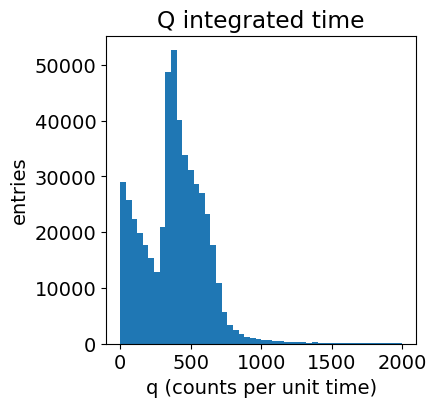

In [58]:
b, e = histoplot(dfi.amplitude[dfi.amplitude<2000], 'q (counts per unit time)', "entries", bins=50, figsize=(6,6),
                title="Q integrated time")

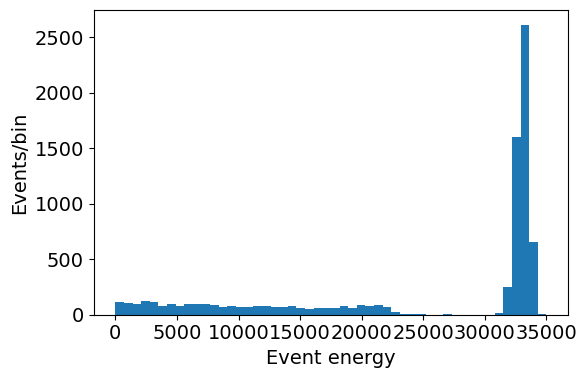

In [59]:
b, e = plot_amplitude(dfi, num_bins = 50, xmin=0, xmax=3.5e+4,figsize=(6, 4), title="")

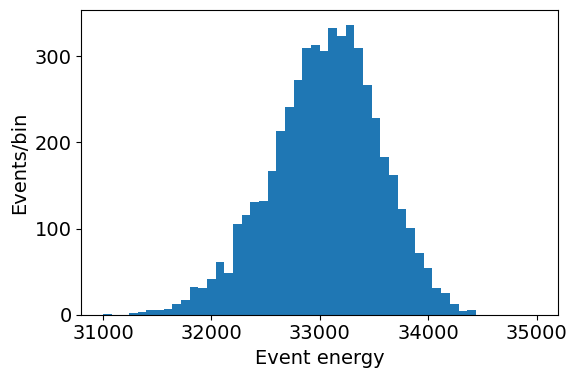

In [60]:
b, e = plot_amplitude(dfi, num_bins = 50, xmin=31000, xmax=3.5e+4,figsize=(6, 4), title="")

In [61]:
np.std(e)/np.mean(e)

0.035683882288193323

### Sensor positions

In [62]:
filenm = "sensor_positions.csv"
dfs = pd.read_csv(f"{rootdir}/{filenm}", header=0)

In [63]:
dfs.head(10)

,sensor_id,sensor_x,sensor_y,sensor_z
0,0,-21,-21,19.1
1,1,-21,-15,19.1
2,2,-21,-9,19.1
3,3,-21,-3,19.1
4,4,-21,3,19.1
5,5,-21,9,19.1
6,6,-21,15,19.1
7,7,-21,21,19.1
8,8,-15,-21,19.1
9,9,-15,-15,19.1


In [64]:
dfs.sensor_x.values

array([-21, -21, -21, -21, -21, -21, -21, -21, -15, -15, -15, -15, -15,
       -15, -15, -15,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -9,  -3,  -3,
        -3,  -3,  -3,  -3,  -3,  -3,   3,   3,   3,   3,   3,   3,   3,
         3,   9,   9,   9,   9,   9,   9,   9,   9,  15,  15,  15,  15,
        15,  15,  15,  15,  21,  21,  21,  21,  21,  21,  21,  21])

In [65]:
dfs.sensor_y.values

array([-21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,   3,
         9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,
        -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,
        21, -21, -15,  -9,  -3,   3,   9,  15,  21, -21, -15,  -9,  -3,
         3,   9,  15,  21, -21, -15,  -9,  -3,   3,   9,  15,  21])

## Images

In [66]:
x_spatial = dfs.sensor_x.values
y_spatial = dfs.sensor_y.values


### Plot a few events

In [67]:
evtsel = 0
charge_matrix = select_image_from_df(dfi,evtsel)


In [68]:
charge_matrix

array([[318., 393., 362., 381., 371., 340., 354., 344.],
       [330., 424., 455., 418., 458., 447., 404., 354.],
       [460., 473., 548., 531., 487., 434., 435., 381.],
       [463., 508., 588., 571., 570., 474., 451., 397.],
       [543., 625., 640., 655., 655., 556., 495., 432.],
       [645., 762., 801., 684., 668., 631., 467., 432.],
       [566., 704., 745., 673., 659., 549., 483., 431.],
       [490., 691., 658., 630., 579., 487., 552., 429.]])

In [71]:
sel_events = df2c.event.values

xg1 = 20.2, yg1 =-6.4
xg2 = 20.2, yg2 =-6.4


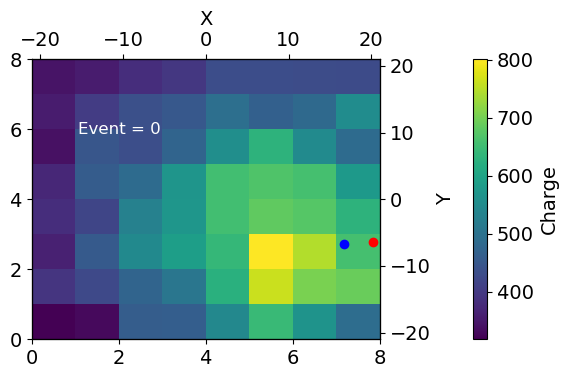

In [72]:
plot_image(dfi, df2c,  sel_events[0], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 9.2, yg1 =-4.0
xg2 = 9.2, yg2 =-4.0


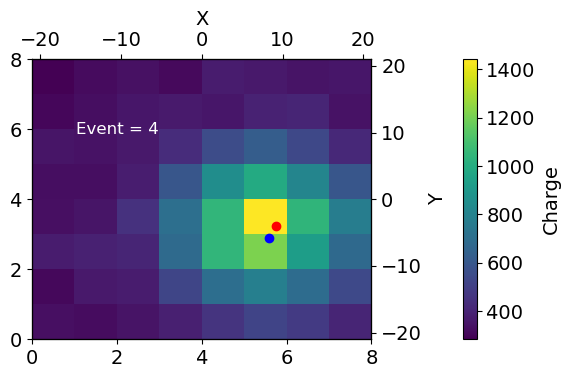

In [73]:
plot_image(dfi, df2c,  sel_events[1], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 0.6, yg1 =11.5
xg2 = 0.6, yg2 =11.5


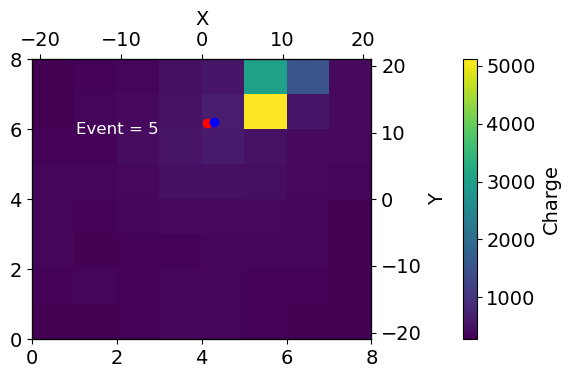

In [74]:
plot_image(dfi, df2c,  sel_events[2], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 7.3, yg1 =1.1
xg2 = 7.3, yg2 =1.1


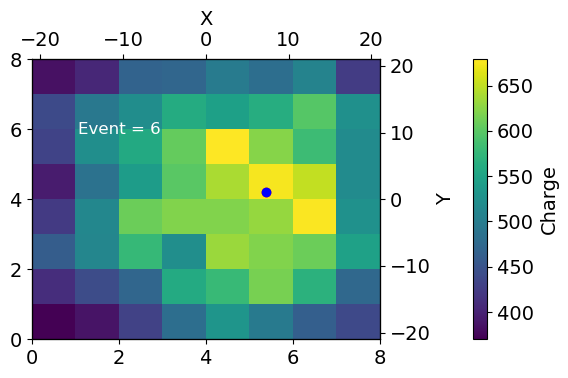

In [75]:
plot_image(dfi, df2c,  sel_events[3], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 6.9, yg1 =14.1
xg2 = 6.9, yg2 =14.1


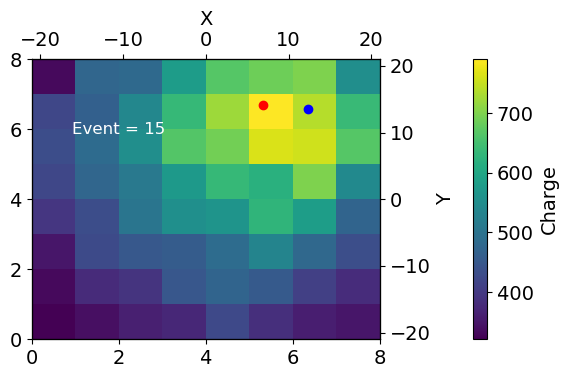

In [76]:
plot_image(dfi, df2c,  sel_events[10], x_spatial, y_spatial, figsize=(6, 4))

xg1 = -5.6, yg1 =14.6
xg2 = -5.6, yg2 =14.6


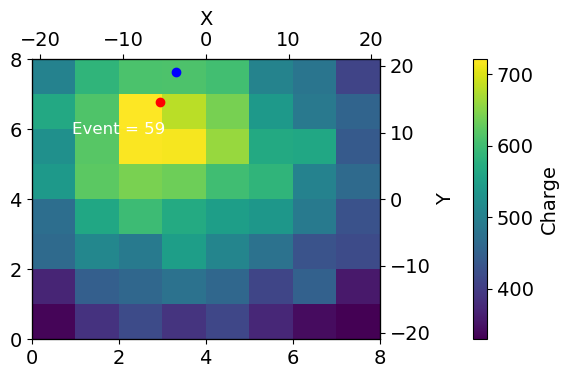

In [77]:
plot_image(dfi, df2c,  sel_events[20], x_spatial, y_spatial, figsize=(6, 4))